In [1]:
lines = open('input1.txt', 'r').readlines()
left_list = []
right_list = []
for line in lines:
	first, second = line.split('   ')
	left_list.append(int(first))
	right_list.append(int(second))
left_list.sort()
right_list.sort()

difference = sum(abs(a-b) for a,b in zip(left_list, right_list))
print(f'The sum of the differences between the numbers in the list is {difference}')

numbers = set(right_list)
counts = {}
for number in numbers:
	counts[number] = right_list.count(number)

similarity_score = sum(number*counts[number] for number in left_list if number in counts)
print(f'The similarity score is {similarity_score}')

The sum of the differences between the numbers in the list is 3508942
The similarity score is 26593248


In [2]:
readings = open('input2.txt', 'r').readlines()

def is_safe(line):
	increasing = True
	decreasing = True
	correct_difference = True
	previous = -1
	for x in line.split(' '):
		x = int(x)
		if previous != -1:
			if x > previous:
				decreasing = False
			if x < previous:
				increasing = False
			if not 1 <= abs(x - previous) <= 3:
				correct_difference = False
		previous = x
	if not correct_difference or not (increasing or decreasing):
		return False
	else:
		return True

safe_readings = sum(1 if safe else 0 for safe in [is_safe(line) for line in readings])
print(f'The number of safe readings is {safe_readings}')

# Brute force the problem dampener
safe_dampened_readings = 0
for reading in readings:
	if is_safe(reading):
		safe_dampened_readings += 1
		continue
	numbers = reading.split(' ')
	for i in range(len(numbers)):
		dampened_reading = ' '.join(numbers[:i] + numbers[i+1:])
		if is_safe(dampened_reading):
			safe_dampened_readings += 1
			break

print(f'The number of safe dampened readings is {safe_dampened_readings}')

The number of safe readings is 213
The number of safe dampened readings is 285


In [3]:
import re
instructions = open('input3.txt', 'r').read()
non_corrupt = re.findall('mul\\((\\d+),(\\d+)\\)',instructions)
print(f'The sum of the real instructions is {sum(int(a)*int(b) for a,b in non_corrupt)}')

# Do or don't
enabled = True
total = 0

finished = False
remaining_instructions = instructions
while not finished:
	first_do = re.search('do\\(\\)', remaining_instructions)
	first_dont = re.search('don\'t\\(\\)', remaining_instructions)
	first_mul = re.search('mul\\((\\d+),(\\d+)\\)', remaining_instructions)

	if first_do is None and first_dont is None and first_mul is None:
		finished = True
		break

	do_hit = dont_hit = mul_hit = len(remaining_instructions)
	if first_do is not None:
		do_hit = first_do.span()[0]
	if first_dont is not None:
		dont_hit = first_dont.span()[0]
	if first_mul is not None:
		mul_hit = first_mul.span()[0]

	if do_hit < dont_hit and do_hit < mul_hit:
		enabled = True
		remaining_instructions = remaining_instructions[first_do.span()[1]:]
		
	if dont_hit < do_hit and dont_hit < mul_hit:
		enabled = False
		remaining_instructions = remaining_instructions[first_dont.span()[1]:]

	if mul_hit < do_hit and mul_hit < dont_hit:
		if enabled:
			total += int(first_mul.group(1)) * int(first_mul.group(2))
		remaining_instructions = remaining_instructions[first_mul.span()[1]:]
print(f'The sum of all conditional muls is {total}')

The sum of the real instructions is 166357705
The sum of all conditional muls is 88811886


In [4]:
word_search = open('input4.txt', 'r').readlines()

directions = [
	(1, 0),
	(1, 1),
	(0, 1),
	(-1, 1),
	(-1, 0),
	(-1, -1),
	(0, -1),
	(1, -1)
]

def look_for_word(row, column):
	if word_search[row][column] != 'X':
		return 0

	words_found = 0
	for direction in directions:
		for i in range(3):
			new_row = row + direction[1]*(i+1)
			new_column = column + direction[0]*(i+1)

			if new_row < 0 or new_row >= len(word_search):
				break
			if new_column < 0 or new_column >= len(word_search[new_row]):
				break

			new_letter = word_search[new_row][new_column]
			if i == 0 and new_letter != 'M':
				break
			if i == 1 and new_letter != 'A':
				break
			if i == 2 and new_letter == 'S':
				words_found += 1

	return words_found

def look_for_xmas(row, column):
	if word_search[row][column] != 'A':
		return 0

	if (not 0 < row < len(word_search) - 1) or (not 0 < column < len(word_search[column]) - 1):
		return 0

	first_diagonal = word_search[row-1][column-1] + word_search[row+1][column+1]
	if (not 'M' in first_diagonal) or (not 'S' in first_diagonal):
		return 0

	second_diagonal = word_search[row-1][column+1] + word_search[row+1][column-1]
	if (not 'M' in second_diagonal) or (not 'S' in second_diagonal):
		return 0

	return 1

words_found = 0
x_mases_found = 0
for row in range(len(word_search)):
	for column in range(len(word_search[row])):
		words_found += look_for_word(row, column)
		x_mases_found += look_for_xmas(row, column)
print(f'Found XMAS {words_found} times')
print(f'Found X-MAS {x_mases_found} times')

Found XMAS 2718 times
Found X-MAS 2046 times


In [5]:
full_input = open('input5.txt', 'r').read()

rules_text, updates_text = full_input.strip().split('\n\n')
rules = []
page_to_first_rule_map = {}
page_to_second_rule_map = {}
for rule in rules_text.split('\n'):
	first_page, second_page = [int(x) for x in rule.split('|')]
	rule_number = len(rules)
	rules.append((first_page, second_page))

	if first_page not in page_to_first_rule_map:
		page_to_first_rule_map[first_page] = set()
	page_to_first_rule_map[first_page].add(rule_number)

	if second_page not in page_to_second_rule_map:
		page_to_second_rule_map[second_page] = set()
	page_to_second_rule_map[second_page].add(rule_number)

def check_if_valid(numbers):
	valid = True
	all_numbers = set(numbers)
	iterated_numbers = set()
	for number in numbers:
		iterated_numbers.add(number)
		if number in page_to_second_rule_map:
			relevant_rules = page_to_second_rule_map[number]
			for rule in relevant_rules:
				first_page, _ = rules[rule]
				if first_page in all_numbers and first_page not in iterated_numbers:
					valid = False
	return valid

updates = [[int(x) for x in line.split(',')] for line in updates_text.split('\n')]
valid_updates = []
for index, numbers in enumerate(updates):
	if check_if_valid(numbers):
		valid_updates.append(index)
		
middle_numbers = 0
for valid_update in valid_updates:
	update_length = len(updates[valid_update])
	middle_numbers += updates[valid_update][update_length // 2]
print(f'The sum of middle pages in the valid updates is {middle_numbers}')

corrected_updates = []
for index, update in enumerate(updates):
	if index in valid_updates:
		continue
	reconstructed = []
	for number in update:
		must_be_before = set()
		if number in page_to_first_rule_map:
			rule_numbers = page_to_first_rule_map[number]
			for rule_number in rule_numbers:
				must_be_before.add(rules[rule_number][1])
		lowest_index = -1
		for other_number in must_be_before:
			if other_number in reconstructed:
				if lowest_index == -1 or reconstructed.index(other_number) < lowest_index:
					lowest_index = reconstructed.index(other_number)
		if lowest_index == -1:
			reconstructed.append(number)
		else:
			reconstructed.insert(lowest_index, number)
	corrected_updates.append(reconstructed)

middle_numbers = 0
for corrected_update in corrected_updates:
	middle_numbers += corrected_update[len(corrected_update) // 2]
print(f'The sum of middle pages in the corrected updates is {middle_numbers}')
	

The sum of middle pages in the valid updates is 4185
The sum of middle pages in the corrected updates is 4480


In [6]:
map_data = open('input6.txt', 'r').read()
directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
guard = None
obstacles = set()

def move_guard(guard, obstacles):
	position, direction = guard
	moved = False
	while True:
		next_position = (position[0] + directions[direction][0], position[1] + directions[direction][1])
		if next_position not in obstacles:
			return (next_position, direction)
		direction = (direction + 1) % len(directions)

map_lines = map_data.split('\n')
height = len(map_lines)
width = len(map_lines[0])

def is_guard_inside(guard):
	(x, y), _ = guard
	if 0 <= x < width and 0 <= y < height:
		return True
	else:
		return False

for y, line in enumerate(map_lines):
	for x, map_item in enumerate(line):
		if map_item == '#':
			obstacles.add((x, y))
		elif map_item == '^':
			guard = ((x, y), 0)

def find_steps_or_loop(guard, obstacles):
	visited_locations = set()
	location_directions = {}
	while is_guard_inside(guard):
		guard_position, guard_direction = guard
		visited_locations.add(guard_position)
		if guard_position not in location_directions:
			location_directions[guard_position] = set()
		if guard_direction in location_directions[guard_position]:
			return -1, visited_locations
		location_directions[guard_position].add(guard_direction)
		guard = move_guard(guard, obstacles)
	return len(visited_locations), visited_locations

number_of_steps, visited_locations = find_steps_or_loop(guard, obstacles)
print(f'The guard visits {number_of_steps} locations before leaving the map')

# Find loops
loop_placements = set()
for x,y in visited_locations:
	if (x,y) in obstacles or (x,y) == guard[0]:
		continue
	obstacles_copy = set(obstacles)
	obstacles_copy.add((x,y))
	if find_steps_or_loop(guard, obstacles_copy)[0] == -1:
		loop_placements.add((x,y))

print(f'There are {len(loop_placements)} locations that will set the guard into a loop')

The guard visits 5305 locations before leaving the map
There are 2143 locations that will set the guard into a loop


In [7]:
equations_input = open('input7.txt', 'r').readlines()
equations = []
for line in equations_input:
	parts = line.split(':')
	target = int(parts[0])
	numbers = [int(x) for x in parts[1].strip().split(' ')]
	equations.append((target, numbers))

def add_operator(old_value, new_number):
	return old_value + new_number

def multiply_operator(old_value, new_number):
	return old_value * new_number

def find_solvable_equations(equations, operators):

	def is_solvable(equation):
		target, numbers = equation
		if len(numbers) == 1:
			return target == numbers[0]
		else:
			results = []
			for operator in operators:
				new_start = operator(numbers[0], numbers[1])
				results.append(is_solvable((target, [new_start] + numbers[2:])))
			return any(results)

	solvable_equations = []
	for index, equation in enumerate(equations):
		if is_solvable(equation):
			solvable_equations.append(index)
	return solvable_equations

solvable_equations = find_solvable_equations(equations, [add_operator, multiply_operator])
solvable_sum = sum(equations[index][0] for index in solvable_equations)
print(f'The sum of the solvable equations is {solvable_sum}')

def concatenation_operator(old_value, new_number):
	return int(str(old_value) + str(new_number))

solvable_equations = find_solvable_equations(equations, [add_operator, multiply_operator, concatenation_operator])
solvable_sum = sum(equations[index][0] for index in solvable_equations)
print(f'The sum of the solvable equations is {solvable_sum}')

The sum of the solvable equations is 2501605301465
The sum of the solvable equations is 44841372855953


In [8]:
map_input = open('input8.txt', 'r').readlines()
height = len(map_input)
width = len(map_input[0].strip())
frequencies = {}
occupied = set()

for y, line in enumerate(map_input):
	for x, character in enumerate(line.strip()):
		if character == '.':
			continue
		if character not in frequencies:
			frequencies[character] = []
		frequencies[character].append((x, y))
		#occupied.add((x,y))

anti_nodes = set()
anti_nodes_all = set()
for frequency in frequencies:
	positions = frequencies[frequency]
	for i in range(len(positions)):
		for j in range(i+1, len(positions)):
			x1, y1 = positions[i]
			x2, y2 = positions[j]

			diff_x = x2 - x1
			diff_y = y2 - y1

			x3 = x1 - diff_x
			y3 = y1 - diff_y
			if 0 <= x3 < width and 0 <= y3 < height and (x3, y3) not in occupied:
				anti_nodes.add((x3, y3))

			x4 = x2 + diff_x
			y4 = y2 + diff_y
			if 0 <= x4 < width and 0 <= y4 < height and (x4, y4) not in occupied:
				anti_nodes.add((x4, y4))

			x_iterative = x1
			y_iterative = y1

			while 0 <= x_iterative < width and 0 <= y_iterative < height:
				x_iterative -= diff_x
				y_iterative -= diff_y

			x_iterative += diff_x
			y_iterative += diff_y

			while 0 <= x_iterative < width and 0 <= y_iterative < height:
				anti_nodes_all.add((x_iterative, y_iterative))
				x_iterative += diff_x
				y_iterative += diff_y

print(f'There are {len(anti_nodes)} anti-nodes')
print(f'There are {len(anti_nodes_all)} anti-nodes in part two')

There are 409 anti-nodes
There are 1308 anti-nodes in part two


In [9]:
file_system = open('input9.txt', 'r').read()
#file_system = '2333133121414131402'

class Interval:
	def __init__(self, start, end, id):
		self.start = start
		self.end = end
		self.id = id

	def get_checksum(self):
		return self.id * (self.end * (self.end + 1) - self.start * (self.start - 1)) // 2

intervals = []
position_counter = 0
id_counter = 0
is_data = True
for length_digit in file_system.strip():
	length = int(length_digit)

	if is_data:
		intervals.append(Interval(position_counter, position_counter + length - 1, id_counter))
		id_counter += 1
	position_counter += length
	is_data = not is_data

part_two_intervals = list(intervals)

def find_gaps(intervals):
	expected_start = 0
	gaps = []
	for interval in intervals:
		if interval.start != expected_start:
			gaps.append((expected_start, interval.start - 1))
		expected_start = interval.end + 1
	return gaps

def print_test_string(intervals):
	counter = 0
	test_string = ''
	while True:
		found_interval = None
		has_larger = False
		for interval in intervals:
			if interval.start <= counter <= interval.end:
				found_interval = interval
				break
			elif interval.start > counter:
				has_larger = True
				
		counter += 1
		if found_interval is None:
			if not has_larger:
				break
			test_string += '.'
		else:
			test_string += str(found_interval.id)
	
	print(test_string)

while len(gaps := find_gaps(intervals)) > 0:
	first_gap = gaps[0]
	last_interval = intervals.pop()
	gap_length = first_gap[1] - first_gap[0] + 1
	interval_length = last_interval.end - last_interval.start + 1

	intervals_to_append = []

	if interval_length <= gap_length:
		intervals_to_append.append(Interval(first_gap[0], first_gap[0] + interval_length - 1, last_interval.id))
	else:
		intervals_to_append.append(Interval(first_gap[0], first_gap[1], last_interval.id))
		intervals_to_append.append(Interval(last_interval.start + gap_length, last_interval.end, last_interval.id))
	# Insertion sort
	for i in range(len(intervals)):
		if len(intervals_to_append) == 0:
			break
		if intervals_to_append[0].start < intervals[i].start:
			insertion_interval = intervals_to_append.pop(0)
			intervals.insert(i, insertion_interval)

	while len(intervals_to_append) > 0:
		remaining_interval = intervals_to_append.pop(0)
		intervals.append(remaining_interval)

checksum = sum(i.get_checksum() for i in intervals)
print(f'The checksum of the rearranged file system is {checksum}')

files = list(part_two_intervals)
for file in files[::-1]:
	file_length = file.end + 1 - file.start
	gaps = find_gaps(part_two_intervals)
	for gap in gaps:
		gap_length = gap[1] + 1 - gap[0]
		if gap_length >= file_length and gap[0] < file.start:
			part_two_intervals = [interval for interval in part_two_intervals if interval.id != file.id]
			part_two_intervals.append(Interval(gap[0], gap[0] + file_length - 1, file.id))
			part_two_intervals.sort(key=lambda i: i.start)
			break


checksum = sum(i.get_checksum() for i in part_two_intervals)
print(f'The checksum of the rearranged file system is {checksum}')

The checksum of the rearranged file system is 6435922584968
The checksum of the rearranged file system is 6469636832766


In [10]:
data = '''89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732'''

data = open('input10.txt', 'r').read()

topo_map = [[int(x) for x in line.strip()] for line in data.strip().split('\n')]
height = len(topo_map)
width = len(topo_map[0])
directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]


def add_tuples(t1, t2):
	return t1[0] + t2[0], t1[1] + t2[1]


def find_trails(x, y, previous_trail):
	level = topo_map[y][x]
	trails = []
	for direction in directions:
		neighbour_x, neighbour_y = add_tuples((x, y), direction)
		if (not 0 <= neighbour_x < width) or (not 0 <= neighbour_y < height):
			continue
		neighbour_level = topo_map[neighbour_y][neighbour_x]
		if neighbour_level == level+1:
			trail_so_far = list(previous_trail) + [(neighbour_x, neighbour_y)]
			if neighbour_level == 9:
				trails.append(trail_so_far)
			else:
				trails = trails + find_trails(neighbour_x, neighbour_y, trail_so_far)
	return trails

trails = []
for x in range(width):
	for y in range(height):
		if topo_map[y][x] == 0:
			trails = trails + find_trails(x, y, [(x, y)])

trailheads = {}
for trail in trails:
	trailhead = trail[0]
	if trailhead not in trailheads:
		trailheads[trailhead] = []
	trailheads[trailhead].append(trail)

def get_trailhead_score(list_of_trails):
	return len(set([trail[-1] for trail in list_of_trails]))

trailhead_scores = sum(get_trailhead_score(trailheads[trailhead]) for trailhead in trailheads)
print(f'The sum of the scores of the trailheads is {trailhead_scores}')

trailhead_ratings = sum(len(trailheads[trailhead]) for trailhead in trailheads)
print(f'The sum of the ratings of the trailheads is {trailhead_ratings}')

The sum of the scores of the trailheads is 694
The sum of the ratings of the trailheads is 1497


In [11]:
stone_data = open('input11.txt', 'r').read()
#stone_data = '125 17'

stones = {}
for stone in [int(x) for x in stone_data.strip().split(' ')]:
	if stone not in stones:
		stones[stone] = 0
	stones[stone] += 1

def add_to_stones(stones, key, value):
	if key not in stones:
		stones[key] = 0
	stones[key] += value

for i in range(75):
	new_stones = {}
	for stone in stones:
		digits = len(str(stone))
		if stone == 0:
			add_to_stones(new_stones, 1, stones[stone])
		elif digits % 2 == 0:
			stone_one = int(str(stone)[:digits//2])
			stone_two = int(str(stone)[digits//2:])
			add_to_stones(new_stones, stone_one, stones[stone])
			add_to_stones(new_stones, stone_two, stones[stone])
		else:
			add_to_stones(new_stones, 2024*stone, stones[stone])
	stones = new_stones
	if i == 24 or i == 74:
		number_of_stones = sum(stones[stone] for stone in stones)
		print(f'The number of stones after {i+1} blinks is {number_of_stones}')

The number of stones after 25 blinks is 189167
The number of stones after 75 blinks is 225253278506288


In [12]:
from collections import defaultdict
from functools import reduce

garden_input = open('input12.txt', 'r').read()
directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]


def get_number_of_neighbours_inside_region(region: set[tuple[int, int]], position: tuple[int, int]) -> int:
	px, py = position
	possible_points = set([(px + dx, py + dy) for dx, dy in directions])
	return len(region.intersection(possible_points))


def build_regions(positions: set[tuple[int, int]]) -> list[set[tuple[int, int]]]:
	found_regions = []
	for position in positions:
		touching_regions = [region for region in found_regions if
							get_number_of_neighbours_inside_region(region, position) > 0]
		# Create a large region out of all the regions we've found that touch this point. If there are no touching
		# regions, the new combined region will just consist of the position itself.
		combined_region = reduce(lambda cumulative_region, new_region: cumulative_region.union(new_region),
								 touching_regions, set())
		combined_region.add(position)
		# Remove all touching regions from the previously found regions, and add the new combined region
		found_regions = [region for region in found_regions if region not in touching_regions]
		found_regions.append(combined_region)
	return found_regions


def find_region_perimeter(region: set[tuple[int, int]]) -> int:
	return sum(4 - get_number_of_neighbours_inside_region(region, position) for position in region)


def find_number_of_sides(region: set[tuple[int, int]]) -> int:
	# Create a list of edge_pieces, ordered by which orientation their edge has. A corner piece may be part of more than
	# one orientation. Later, find all the regions of edge that touch each other and whose edges have the same
	# orientation, since these must necessarily comprise a side.
	edge_orientations = []
	for dx, dy in directions:
		edge_orientations.append(set([(px, py) for px, py in region if (px + dx, py + dy) not in region]))
	return sum(len(build_regions(positions)) for positions in edge_orientations)


plants = defaultdict(set)
for y, line in enumerate(garden_input.strip().split('\n')):
	for x, plant_type in enumerate(line):
		plants[plant_type].add((x, y))

regions = [region for region in build_regions(plants[plant_type]) for plant_type in plants]

fence_price = sum(len(region) * find_region_perimeter(region) for region in regions)
print(f'The total price of fencing is {fence_price}')

bulk_price = fence_price = sum(len(region) * find_number_of_sides(region) for region in regions)
print(f'The total bulk price of fencing is {bulk_price}')


The total price of fencing is 1490528
The total bulk price of fencing is 848952


In [13]:
import re
machine_behaviours = open('input13.txt', 'r').read()

machines = []
far_machines = []
for machine_input in machine_behaviours.split('\n\n'):
	button_a_match = re.search(r'Button A: X([+-]\d+), Y([+-]\d+)', machine_input)
	ax = int(button_a_match.group(1))
	ay = int(button_a_match.group(2))
	
	button_b_match = re.search(r'Button B: X([+-]\d+), Y([+-]\d+)', machine_input)
	bx = int(button_b_match.group(1))
	by = int(button_b_match.group(2))
	
	prize_match = re.search(r'Prize: X=([+-]*\d+), Y=([+-]*\d+)', machine_input)
	px = int(prize_match.group(1))
	py = int(prize_match.group(2))

	machines.append(((ax, ay), (bx, by), (px, py)))
	far_machines.append(((ax, ay), (bx, by), (px+10000000000000, py+10000000000000)))


def find_cheapest_path(machine):
	(ax, ay), (bx, by), (px, py) = machine
	n = (px - bx*py/by) / (ax - ay*bx/by)
	k = (py - n*ay)/by

	# Check that these are actually integer solutions
	n = int(round(n))
	k = int(round(k))

	if not n*ax + k*bx == px:
		return -1, -1
	if not n*ay + k*by == py:
		return -1, -1
	return n, k


def find_token_cost(machines):
	return sum(3*n + k for n, k in [find_cheapest_path(machine) for machine in machines] if n != -1 and k != -1)


print(f'The cheapest (and only) way to win the most prizes costs {find_token_cost(machines)}')
print(f'The cheapest (and only) way to win the most prizes in part two is {find_token_cost(far_machines)}')

The cheapest (and only) way to win the most prizes costs 28887
The cheapest (and only) way to win the most prizes in part two is 96979582619758


The safety factor is 230435667
The following picture appeared at time 7709:


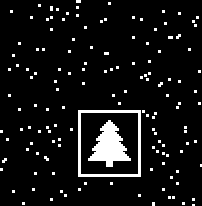

In [14]:
import re
from functools import reduce
import time
from PIL import Image, ImageDraw

robots_input = '''p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3'''

width = 11
height = 7

robots_input = open('input14.txt', 'r').read()
width = 101
height = 103

robots = []
for line in robots_input.strip().split('\n'):
	robot_match = re.search(r'p=([+-]*\d+),([+-]*\d+) v=([+-]*\d+),([+-]*\d+)', line)
	px = int(robot_match.group(1))
	py = int(robot_match.group(2))
	vx = int(robot_match.group(3))
	vy = int(robot_match.group(4))
	robots.append(((px, py), (vx, vy)))

def move_robot(robot, time):
	(px, py), (vx, vy) = robot
	px = (px + vx*time) % width
	py = (py + vy*time) % height
	return (px, py), (vx, vy)

def simulate(robots, time):
	return [move_robot(robot, time) for robot in robots]

def count_quadrants(robots):
	counted = [[], [], [], []]
	for robot in robots:
		(px, py), _ = robot
		if px < width // 2 and py < height // 2:
			counted[0].append(robot)
		elif px > width // 2 and py < height // 2:
			counted[1].append(robot)
		elif px < width // 2 and py > height // 2:
			counted[2].append(robot)
		elif px > width // 2 and py > height // 2:
			counted[3].append(robot)
	return counted

moved_robots = simulate(robots, 100)
quadrant_count = count_quadrants(moved_robots)
safety_factor = reduce(lambda old, new: old * len(new), quadrant_count, 1)
print(f'The safety factor is {safety_factor}')

for i in range(1):
	elapsed = 7709 + i*101
	moved_robots = simulate(robots, elapsed)
	positions = set([(px, py) for (px, py), _ in moved_robots])
	img = Image.new(mode='RGB', size=(2*width, 2*height))
	draw = ImageDraw.Draw(img)
	for (px, py), _ in moved_robots:
		draw.rectangle(xy = (2*px, 2*py, 2*px+2, 2*py+2), fill=(255, 255,255))
	print(f'The following picture appeared at time {elapsed}:')
	display(img)

In [15]:
logistics_input = open('input15.txt', 'r').read()
logistics_map, logistics_instructions = logistics_input.split('\n\n')

walls = set()
boxes = set()
robot = (-1,-1)

directions = {
	'<': (-1, 0), 
	'^': (0, -1),
	'>': (1, 0),
	'v': (0, 1)
}

for y, line in enumerate(logistics_map.strip().split('\n')):
	for x, map_marking in enumerate(line):
		if map_marking == '#':
			walls.add((x, y))
		elif map_marking == 'O':
			boxes.add((x,y))
		elif map_marking == '@':
			robot = (x, y)

wide_walls = set()
for x,y in walls:
	wide_walls.add((2*x, y))
	wide_walls.add((2*x+1, y))

wide_boxes = [(2*x, y) for x,y in boxes]


def draw_situation(robot, boxes, walls, wide):
	width = (2 if wide else 1) * len(logistics_map.strip().split('\n')[0].strip())
	height = len(logistics_map.strip().split('\n'))
	situation = [[c for c in ('.' * width)] for i in range(height)]
	rx, ry = robot
	situation[ry][rx] = '@'
	for wx, wy in walls:
		situation[wy][wx] = '#'
	for bx, by in boxes:
		if wide:
			situation[by][bx] = '['
			situation[by][bx+1] = ']'
		else:
			situation[by][bx] = 'O'

	print('\n'.join(''.join(c for c in line) for line in situation))


def move_box(box, boxes, walls, direction, wide):
	moved_boxes = set(boxes)
	boxes_to_move = [box]
	dx, dy = direction
	hit_wall = False
	i = 0
	while i < len(boxes_to_move):
		bx, by = boxes_to_move[i]
		i += 1
		spaces_moved_into = [(bx+dx, by+dy)]
		if wide:
			spaces_moved_into.append((bx+dx+1, by+dy))

		for sx, sy in spaces_moved_into:
			if (sx, sy) in walls:
				hit_wall = True
				break
			if (sx, sy) in boxes and (sx, sy) not in boxes_to_move:
				boxes_to_move.append((sx, sy))
			if wide and (sx-1, sy) in boxes and (sx-1, sy) not in boxes_to_move:
				boxes_to_move.append((sx-1, sy))

		if hit_wall:
			break
			
	if hit_wall:
		return False, moved_boxes

	for box in boxes_to_move:
		moved_boxes.remove(box)
	for x,y in boxes_to_move:
		moved_boxes.add((x+dx, y+dy))
	return True, moved_boxes


def follow_instructions(robot, boxes, walls, instructions, wide):
	boxes = set(boxes)
	walls = set(walls)
	
	for index, instruction in enumerate(instructions):
		if instruction == '\n':
			continue
		x, y = robot
		direction = directions[instruction]
		dx, dy = direction

		if (x+dx, y+dy) in walls:
			continue

		if (box := (x+dx, y+dy)) in boxes or (wide and (box := (x+dx-1, y+dy)) in boxes):
			moved, boxes = move_box(box, boxes, walls, direction, wide)
			if not moved:
				continue

		robot = (x+dx, y+dy)

		#draw_situation(robot, boxes, walls, wide)
		#print()

	return robot, boxes, walls

def calculate_gps_sum(boxes):
	return sum(y*100+x for x,y in boxes)

moved_robot, moved_boxes, walls = follow_instructions(robot, boxes, walls, logistics_instructions, False)
print(f'The sum of GPS coordinates is {calculate_gps_sum(moved_boxes)}')

wide_robot = (2*robot[0], robot[1])
moved_robot, moved_boxes, wide_walls = follow_instructions(wide_robot, wide_boxes, wide_walls, logistics_instructions, True)
print(f'The sum of GPS coordinates in the wide storeroom is {calculate_gps_sum(moved_boxes)}')

The sum of GPS coordinates is 1509074
The sum of GPS coordinates in the wide storeroom is 1521453


In [16]:
import math
from collections import defaultdict

map_input = open('input16.txt', 'r').read()
places = set()
directions = [(1,0), (0, 1), (-1, 0), (0, -1)]

goal = None
reindeer = None
for y, line in enumerate(map_input.strip().split('\n')):
	for x, point in enumerate(line):
		if point != '#':
			places.add((x, y))
		if point == 'E':
			goal = (x, y)
		elif point == 'S':
			reindeer = (x, y, 0)

class Node:
	def __init__(self, position):
		self.position = position
		self.neighbours = {}

	def get_neighbours(self):
		return self.neighbours

nodes = {}
for x, y in places:
	for i in range(4):
		nodes[(x,y,i)] = Node((x,y,i))

for position in nodes:
	node = nodes[position]
	x, y, direction = node.position
	dx, dy = directions[direction]
	node.neighbours[nodes[(x, y, (direction+1) % 4)]] = 1000
	node.neighbours[nodes[(x, y, (direction-1) % 4)]] = 1000
	if (x+dx, y+dy, direction) in nodes:
		node.neighbours[nodes[(x+dx, y+dy, direction)]] = 1

def insertion_sort(list, new_entry, key):
	new_entry_value = key(new_entry)
	i = 0
	while i < len(list) and key(list[i]) < new_entry_value:
		i += 1
	list.insert(i+1, new_entry)

def perform_a_star(start_node, end_nodes, heuristic):
	open_nodes = set([start_node])
	came_from = defaultdict(list)
	lowest_known_cost = defaultdict(lambda: int(1e100))
	heuristic_guess = defaultdict(lambda: int(1e100))

	def find_nodes_on_best_path(node):
		nodes = [node]
		i = 0
		while i < len(nodes):
			if nodes[i] in came_from:
				for earlier_node in came_from[nodes[i]]:
					if earlier_node not in nodes:
						nodes.append(earlier_node)
			i += 1
		return nodes

	lowest_known_cost[start_node] = 0
	heuristic_guess[start_node] = heuristic(start_node)

	while len(open_nodes) > 0:
		current = sorted(list(open_nodes), key=lambda node: heuristic_guess[node]).pop(0)
		open_nodes.remove(current)

		if current in end_nodes:
			return find_nodes_on_best_path(current), lowest_known_cost[current]

		for neighbour in current.neighbours:
			possible_cost = lowest_known_cost[current] + current.neighbours[neighbour]
			if possible_cost < lowest_known_cost[neighbour]:
				came_from[neighbour] = [current]
				lowest_known_cost[neighbour] = possible_cost
				heuristic_guess[neighbour] = possible_cost + heuristic(neighbour)
				open_nodes.add(neighbour)
			if possible_cost == lowest_known_cost[neighbour]:
				came_from[neighbour].append(current)

	return [], 0

start_node = nodes[(reindeer[0], reindeer[1], 0)]
end_nodes = set([nodes[(goal[0], goal[1], i)] for i in range(4)])

def distance_heuristic(node):
	x, y, _ = node.position
	ex, ey = goal
	return math.sqrt((ex - x)**2 + (ey - y)**2)

path, cost = perform_a_star(start_node, end_nodes, distance_heuristic)
print(f'The best path has a score of {cost}')
visited_nodes = set([(node.position[0], node.position[1]) for node in path])
print(f'There are {len(visited_nodes)} nodes that are on at least one of the best paths')

The best path has a score of 95476
There are 511 nodes that are on at least one of the best paths


In [17]:
import re
computer_input = open('input17.txt', 'r').read()

class Computer:
	def __init__(self, register_a, register_b, register_c, instructions):
		self.register_a = register_a
		self.register_b = register_b
		self.register_c = register_c
		self.instruction_pointer = 0
		self.instructions = instructions
		self.outputs = []

		self.loop_stopper = set()

	def get_combo_operand(self, value):
		if 0 <= value <= 3:
			return value
		elif value == 4:
			return self.register_a
		elif value == 5:
			return self.register_b
		elif value == 6:
			return self.register_c

	def adv(self, operand):
		numerator = self.register_a
		denominator = 2**self.get_combo_operand(operand)
		self.register_a = numerator // denominator

	def bxl(self, operand):
		self.register_b = self.register_b ^ operand

	def bst(self, operand):
		self.register_b = self.get_combo_operand(operand) % 8

	def jnz(self, operand):
		if self.register_a != 0:
			loop_value = (operand, self.register_a, self.register_b, self.register_c)
			if loop_value in self.loop_stopper:
				self.outputs = []
				self.instruction_pointer = 1e100
				print('Broke loop\n')
			self.loop_stopper.add(loop_value)
			self.instruction_pointer = operand - 2

	def bxc(self, operand):
		self.register_b = self.register_b ^ self.register_c

	def out(self, operand):
		self.outputs.append(self.get_combo_operand(operand) % 8)

	def bdv(self, operand):
		numerator = self.register_a
		denominator = 2**self.get_combo_operand(operand)
		self.register_b = numerator // denominator

	def cdv(self, operand):
		numerator = self.register_a
		denominator = 2**self.get_combo_operand(operand)
		self.register_c = numerator // denominator

	def compute(self):
		instruction = self.instructions[self.instruction_pointer]
		operand = self.instructions[self.instruction_pointer+1]

		if instruction == 0:
			self.adv(operand)
		elif instruction == 1:
			self.bxl(operand)
		elif instruction == 2:
			self.bst(operand)
		elif instruction == 3:
			self.jnz(operand)
		elif instruction == 4:
			self.bxc(operand)
		elif instruction == 5:
			self.out(operand)
		elif instruction == 6:
			self.bdv(operand)
		elif instruction == 7:
			self.cdv(operand)

		self.instruction_pointer += 2

initialization, instructions = computer_input.strip().split('\n\n')
register_a = int(re.search(r'Register A: (\d+)', initialization).group(1))
register_b = int(re.search(r'Register B: (\d+)', initialization).group(1))
register_c = int(re.search(r'Register C: (\d+)', initialization).group(1))

instructions = re.search(r'Program: (.+)', instructions).group(1)
instructions = [int(x) for x in instructions.split(',')]

def perform_computation(register_a, instructions):
	computer = Computer(register_a, register_b, register_c, instructions)
	while computer.instruction_pointer < len(computer.instructions):
		computer.compute()
	return computer.outputs

print(f'The output of the computer program is {",".join(str(x) for x in perform_computation(register_a, instructions))}')

def recursive_search(current_register_value, current_depth, instructions):
	digit_to_match = instructions[-current_depth]
	for i in range(8):
		outputs = perform_computation(current_register_value + i, instructions)
		if outputs[-current_depth] == digit_to_match:
			if current_depth == len(instructions):
				return current_register_value + i
			else:
				result = recursive_search((current_register_value + i) * 8, current_depth+1, instructions)
				if result is not None:
					return result
	return None

register_a = recursive_search(56, 2, instructions)
print(f'The smallest register a value that returns the program itself is {register_a}')


The output of the computer program is 2,0,4,2,7,0,1,0,3
The smallest register a value that returns the program itself is 265601188299675


In [18]:
# Use A* from day 16
falling_bytes_input = '''5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0'''

width = 71
height = 71
bytes_to_test = 1024

falling_bytes_input = open('input18.txt', 'r').read()
falling_bytes = [(int(line.split(',')[0]), int(line.split(',')[1])) for line in falling_bytes_input.strip().split('\n')]

def find_route_after_bytes(number_of_bytes):
	impassable = set()
	for i, (x, y) in enumerate(falling_bytes):
		if i == number_of_bytes:
			break
		impassable.add((x,y))
	
	nodes = {}
	# Create nodes
	for x in range(width):
		for y in range(height):
			if (x,y) not in impassable:
				nodes[(x,y)] = Node((x,y))
	# Find node neighbours
	for node_position in nodes:
		node = nodes[node_position]
		x, y = node_position
		for dx, dy in [(0,1), (1,0), (0,-1), (-1, 0)]:
			nx = x + dx
			ny = y + dy
			if (nx, ny) in nodes:
				neighbour_node = nodes[(nx, ny)]
				node.neighbours[neighbour_node] = 1
	
	# Manhattan distance heuristic
	def heuristic(node):
		x, y = node.position
		return width + height - x - y
	
	return perform_a_star(nodes[(0,0)], set([nodes[(width-1,height-1)]]), heuristic)

path, cost = find_route_after_bytes(bytes_to_test)
print(f'It takes {cost} steps to get to the bottom right corner')

# Divide and conquer to find when the route is closed
passable_byte = bytes_to_test
impassable_byte = len(falling_bytes)

while impassable_byte - passable_byte > 1:
	test_byte = (impassable_byte - passable_byte) // 2 + passable_byte
	path, cost = find_route_after_bytes(test_byte)
	if len(path) > 0:
		passable_byte = test_byte
	else:
		impassable_byte = test_byte

print(f'The first byte that makes the maze impassable falls at {falling_bytes[passable_byte]}')

It takes 374 steps to get to the bottom right corner
The first byte that makes the maze impassable falls at (30, 12)


In [19]:
from collections import defaultdict

towel_input = open('input19.txt', 'r').read()
available, wanteds = towel_input.split('\n\n')
available = [x.strip() for x in available.strip().split(',')]
wanteds = [x.strip() for x in wanteds.strip().split('\n')]

longest_wanted = max(len(w) for w in wanteds)
combinations = defaultdict(int)
combinations_of_interest = {i+1: set([w[:i+1] for w in wanteds]) for i in range(longest_wanted)}
previous_combinations = defaultdict(set)

def add_combination(combination, possibilities, length):
	combinations[combination] += possibilities
	previous_combinations[length].add(combination)

for length in combinations_of_interest:
	for pattern in available:
		if len(pattern) == length:
			add_combination(pattern, 1, length)

		for previous_combination in previous_combinations[length - len(pattern)]:
			new_combination = previous_combination + pattern
			if new_combination in combinations_of_interest[length]:
				add_combination(new_combination, combinations[previous_combination], length)
			
print(f'There are {sum(1 for w in wanteds if combinations[w] > 0)} possible patterns')
print(f'The sum of possible combinations for all patterns is {sum(combinations[w] for w in wanteds)}')

There are 276 possible patterns
The sum of possible combinations for all patterns is 681226908011510


In [20]:
from collections import defaultdict

map_data = '''###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############'''

map_data = open('input20.txt', 'r').read()

walls = set()
start = None
end = None
for y, line in enumerate(map_data.strip().split('\n')):
	for x, character in enumerate(line.strip()):
		if character == '#':
			walls.add((x, y))
		elif character == 'S':
			start = (x, y)
		elif character == 'E':
			end = (x, y)

height = max(y for x, y in walls)
width = max(x for x, y in walls)

directions = [(0,1), (0, -1), (1, 0), (-1, 0)]

def find_neighbours(node):
	x, y = node
	neighbours = []
	for dx, dy in directions:
		nx = x + dx
		ny = y + dy
		if (nx, ny) not in walls:
			neighbours.append(((nx, ny), 1))
	return neighbours

def perform_dijkstra(start, find_neighbours):
	distances = defaultdict(lambda: int(1e100))
	distances[start] = 0
	queue = [start]

	while len(queue) > 0:
		current = queue.pop(0)
		for neighbour, distance in find_neighbours(current):
			total_distance = distances[current] + distance
			if total_distance < distances[neighbour]:
				distances[neighbour] = total_distance
				queue.append(neighbour)
	return distances

distances_from_goal = perform_dijkstra(end, find_neighbours)
#distances_from_start = perform_dijkstra(start, find_neighbours)

def get_cheat_ends(cheat_start, max_length):
	cheat_ends = []
	x, y = cheat_start
	for dx in range(-max_length, max_length+1):
		for dy in range(-max_length, max_length+1):
			if abs(dx) + abs(dy) > max_length:
				continue
			cheat_ends.append(((x + dx, y + dy), abs(dx) + abs(dy)))
	return cheat_ends

def find_cheats(max_cheat_time):
	cheats = defaultdict(int)
	for cheat_start, distance_from_goal in distances_from_goal.items():
		x, y = cheat_start
		for cheat_end, cheat_length in get_cheat_ends(cheat_start, max_cheat_time):
			if cheat_end not in distances_from_goal:
				continue
	
			end_distance_from_goal = distances_from_goal[cheat_end]
			saving = distance_from_goal - cheat_length - end_distance_from_goal
			if saving > 0:
				cheats[saving] += 1
	return cheats

cheats = find_cheats(2)
print(f'There are {sum(cheats[cheat] for cheat in cheats if cheat >= 100)} cheats that save at least 100 picoseconds')

cheats = find_cheats(20)
print(f'There are {sum(cheats[cheat] for cheat in cheats if cheat >= 100)} longer cheats that save at least 100 picoseconds')

There are 1404 cheats that save at least 100 picoseconds
There are 1010981 longer cheats that save at least 100 picoseconds


In [21]:
from collections import defaultdict
from functools import reduce

code_input = '''029A
980A
179A
456A
379A'''

code_input = open('input21.txt', 'r').read()
codes = [line.strip() for line in code_input.strip().split('\n')]

numpad = ['hole', '0', 'A', '1', '2', '3', '4', '5', '6', '7', '8', '9']
numpad = {button: (index % 3, index // 3) for index, button in enumerate(numpad)}
dpad = ['<', 'v', '>', 'hole', '^', 'A']
dpad = {button: (index % 3, index // 3) for index, button in enumerate(dpad)}

directions = {'<': (-1, 0), 'v': (0, -1), '>': (1, 0), '^': (0, 1)}

def get_manhattan_distance(position, target):
	return abs(target[0] - position[0]) + abs(target[1] - position[1])

def find_possible_paths(button_one, button_two, pad):
	if button_one == button_two:
		return ['A']
	position = pad[button_one]
	target = pad[button_two]

	paths = [('', position)]
	finished_paths = []
	while len(paths) > 0:
		current_path, (x, y) = paths.pop(0)
		for direction in directions:
			dx, dy = directions[direction]
			nx, ny = (x + dx, y + dy)
			if pad['hole'] == (nx, ny):
				continue
			if get_manhattan_distance((nx, ny), target) == 0:
				finished_paths.append(current_path + direction + 'A')
			elif get_manhattan_distance((nx, ny), target) < get_manhattan_distance((x, y), target):
				paths.append((current_path + direction, (nx, ny)))
	return finished_paths

# Find the most efficient d-pad transitions
transitions = {}
for button_one in dpad:
	if button_one == 'hole':
		continue
	for button_two in dpad:
		if button_two == 'hole':
			continue
		transitions[(button_one), (button_two)] = find_possible_paths(button_one, button_two, dpad)

def expand_direction_instructions(instructions):
	expanded_instruction_alternatives = ['']
	previous_button = 'A'
	for button in instructions:
		expanded_instruction_alternatives = [
			previous + transition 
			for previous in expanded_instruction_alternatives 
			for transition in transitions[(previous_button, button)]
		]
		previous_button = button
	return expanded_instruction_alternatives

search_depth = 1
while len(unfound_transitions := [transition for transition in transitions if len(transitions[transition]) > 1]) > 0:
	for unfound_transition in unfound_transitions:
		alternatives = transitions[unfound_transition]

		best_alternatives = []
		minimum_expanded_length = None
		for alternative in alternatives:
			children = [alternative]
			for i in range(search_depth):
				children = [grandchild for child in children for grandchild in expand_direction_instructions(child)]
			for child in children:
				if minimum_expanded_length is None or len(child) < minimum_expanded_length:
					best_alternatives = [alternative]
					minimum_expanded_length = len(child)
				elif len(child) == minimum_expanded_length and alternative not in best_alternatives:
					best_alternatives.append(alternative)
		transitions[unfound_transition] = best_alternatives
	search_depth += 1

# These transitions are the only thing we need
transitions = {transition: transitions[transition][0] for transition in transitions}
useful_sequences = set(transitions[transition] for transition in transitions)
expansions = {}
for useful_sequence in useful_sequences:
	expansion = ''
	previous_character = 'A'
	for character in useful_sequence:
		expansion += transitions[(previous_character, character)]
		previous_character = character
	sequences = [sequence + 'A' for sequence in expansion.split('A')[:-1]]
	counts = {sequence: sequences.count(sequence) for sequence in sequences}
	expansions[useful_sequence] = counts


def find_length_of_code(code, depth):
	# Find all possible paths to start with
	paths = ['']
	previous_character = 'A'
	for character in code:
		paths = [old + new for old in paths for new in find_possible_paths(previous_character, character, numpad)]
		previous_character = character

	lengths = []
	# For each possible path, expand it to the required depth
	for path in paths:
		previous_character = 'A'
		expanded_sequence = ''
		for character in path:
			expanded_sequence += transitions[(previous_character, character)]
			previous_character = character

		# Turn this into counts
		sequences = [sequence + 'A' for sequence in expanded_sequence.split('A')[:-1]]
		counts = {sequence: sequences.count(sequence) for sequence in sequences}

		# Plunge to the depths
		for i in range(1, depth):
			new_counts = defaultdict(int)
			for sequence, multiplier in counts.items():
				expanded_counts = expansions[sequence]
				for expanded_sequence, expanded_count in expanded_counts.items():
					new_counts[expanded_sequence] += multiplier * expanded_count
			counts = new_counts

		# Discover what we've found
		length = sum(len(sequence)*count for sequence, count in counts.items())
		lengths.append(length)
	return min(lengths)

def find_complexity(codes, depth):
	complexity = 0
	for code in codes:
		numeric = int(code[:-1])
		length = find_length_of_code(code, depth)
		complexity += numeric * length
	return complexity

print(f'The complexity when going through two proxy direction pads is {find_complexity(codes, 2)}')
print(f'The complexity when going through twenty-five proxy direction pads is {find_complexity(codes, 25)}')

The complexity when going through two proxy direction pads is 174124
The complexity when going through twenty-five proxy direction pads is 216668579770346


In [22]:
secrets = [int(x) for x in open('input22.txt', 'r').readlines()]

modulo = 2**24-1

def calculate_next_secret(secret):
	step_one = ((secret << 6) ^ secret) & modulo
	step_two = ((step_one >> 5) ^ step_one) & modulo
	return ((step_two << 11) ^ step_two) & modulo

secret_progressions = []
for secret in secrets:
	progression = []
	for i in range(2001):
		progression.append(secret)
		secret = calculate_next_secret(secret)
	secret_progressions.append(progression)

print(f'The sum of each buyer\'s 2000th secret number is {sum(progression[2000] for progression in secret_progressions)}')
buyer_sequences = []
for progression in secret_progressions:
	buyer_sequence = {}
	previous_number = int(str(progression[0])[-1])
	changes = []
	for i in range(1, len(progression)):
		current_number = int(str(progression[i])[-1])
		change = current_number - previous_number
		previous_number = current_number
		changes.append(change)
		if len(changes) > 3:
			sequence = tuple(changes[-4:])
			if sequence not in buyer_sequence:
				buyer_sequence[sequence] = current_number
	buyer_sequences.append(buyer_sequence)

available_sequences = set(sequence for buyer_sequence in buyer_sequences for sequence in buyer_sequence)
maximum_bananas = max(sum(buyer_sequence[sequence] for buyer_sequence in buyer_sequences if sequence in buyer_sequence) for sequence in available_sequences)
print(f'The maximum amount of bananas that can be earned is {maximum_bananas}')

The sum of each buyer's 2000th secret number is 14082561342
The maximum amount of bananas that can be earned is 1568


In [23]:
from collections import defaultdict
network_input = '''kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn'''

network_input = open('input23.txt', 'r').read()
network = defaultdict(set)
for network_connection in network_input.strip().split('\n'):
	computer_one, computer_two = network_connection.strip().split('-')
	network[computer_one].add(computer_two)
	network[computer_two].add(computer_one)

sets_of_three = []
for computer in network:
	if not computer.startswith('t'):
		continue
	for connected_computer in network[computer]:
		first_computer_connections = network[computer]
		second_computer_connections = network[connected_computer]
		common_connections = first_computer_connections.intersection(second_computer_connections)
		for common_connection in common_connections:
			set_of_three = sorted([computer, connected_computer, common_connection])
			if set_of_three not in sets_of_three:
				sets_of_three.append(set_of_three)

print(f'There are {len(sets_of_three)} sets of three connected computers where at least one computer name starts with t')
# Try Bron-Kerbosch
maximal_cliques = []
P = set(network.keys())
R = set()
X = set()
def bron_kerbosch(R, P, X):
	if len(P) == 0 and len(X) == 0:
		maximal_cliques.append(R)
	while len(P) > 0:
		v = P.pop()
		# Don't actually want to remove the element yet
		P.add(v)
		sub_R = R.copy()
		sub_R.add(v)
		sub_P = P.intersection(network[v])
		sub_X = X.intersection(network[v])
		bron_kerbosch(sub_R, sub_P, sub_X)

		P.remove(v)
		X.add(v)

bron_kerbosch(R, P, X)
maximal_cliques.sort(key=lambda clique: len(clique), reverse=True)
largest_clique = maximal_cliques[0]
computers_involved = sorted(list(largest_clique))
password = ','.join(computer for computer in computers_involved)
print(f'The password for joining the largest LAN is {password}')

There are 1253 sets of three connected computers where at least one computer name starts with t
The password for joining the largest LAN is ag,bt,cq,da,hp,hs,mi,pa,qd,qe,qi,ri,uq


In [24]:
from collections import defaultdict
import re
import random

logic_input = open('/home/martin/dev/jupyter/AdventOfCode/Advent24/input24.txt', 'r').read()

wires_input, gates_input = logic_input.strip().split('\n\n')
wires = {}
gates = []
input_to_gate_index = defaultdict(list)

for gate_input in gates_input.split('\n'):
	match = re.search(r'(.+?) (AND|OR|XOR) (.+?) -> (.+)', gate_input)
	if match is not None:
		wire_one = match.group(1)
		wire_two = match.group(3)
		operation = match.group(2)
		wire_three = match.group(4)

		gate = (wire_one, wire_two, operation, wire_three)
		gates.append(gate)
		gate_index = gates.index(gate)

		wires[wire_one] = None
		wires[wire_two] = None
		wires[wire_three] = None

		input_to_gate_index[wire_one].append(gate_index)
		input_to_gate_index[wire_two].append(gate_index)


def set_input(wire, value):
	wires[wire] = value
	for gate_index in input_to_gate_index[wire]:
		wire_one, wire_two, operation, wire_three = gates[gate_index]
		value_one = wires[wire_one]
		value_two = wires[wire_two]
		if value_one is not None and value_two is not None:
			if operation == 'AND':
				value_three = value_one & value_two
			elif operation == 'OR':
				value_three = value_one | value_two
			elif operation == 'XOR':
				value_three = value_one ^ value_two
			else:
				print('WE HAVE TROUBLE!')
			set_input(wire_three, value_three)


for wire_input in wires_input.split('\n'):
	match = re.search(r'(.+?): (\d)', wire_input)
	if match is not None:
		wire_name = match.group(1)
		wire_value = int(match.group(2))
		set_input(wire_name, wire_value)


def get_output_value():
	output_value = 0
	for wire in wires:
		if wire.startswith('z'):
			bit_number = int(wire[1:])
			value = wires[wire]
			if value is None:
				print('SHORT-CIRCUIT!!')
				break
			output_value += value * 2 ** bit_number
	return output_value


print(f'The output of the wires is {get_output_value()}')

def swap_gates(gate_one_index, gate_two_index):
	gate_one = gates[gate_one_index]
	gate_two = gates[gate_two_index]

	del gates[gate_one_index]
	gates.insert(gate_one_index, (gate_one[0], gate_one[1], gate_one[2], gate_two[3]))
	del gates[gate_two_index]
	gates.insert(gate_two_index, (gate_two[0], gate_two[1], gate_two[2], gate_one[3]))
# The following swaps are found by inspection below
swaps = [(1, 59), (7, 111), (2, 109), (24, 91)]

for gate_one, gate_two in swaps:
	swap_gates(gate_one, gate_two)

previous_carry = None
for bit in range(45):
	input_wires = [f'x{bit:02d}', f'y{bit:02d}']
	current_gates = set([gate for input_wire in input_wires for gate in input_to_gate_index[input_wire]])
	# Should always be two
	if len(current_gates) != 2:
		print(len(current_gates))
		print(f'Error in bit {bit}')
		break
	# One should be xor, the other should be and
	xor_gate = None
	and_gate = None
	for gate_index in current_gates:
		input_one, input_two, operation, output = gates[gate_index]
		if operation == 'AND':
			and_gate = gate_index
		if operation == 'XOR':
			xor_gate = gate_index
	if xor_gate is None or and_gate is None:
		print(xor_gate, and_gate)
		print(f'Error in bit {bit}')
		break

	# First bit is a special case
	if bit == 0:
		_, _, _, output = gates[xor_gate]
		if output != 'z00':
			print(f'Bit {bit} has wrong sum')
		_, _, _, output = gates[and_gate]
		previous_carry = output
		continue

	# XOR gate should lead to a new XOR gate and an AND gate
	gates_after_xor = input_to_gate_index[gates[xor_gate][3]]
	and_gate_output = gates[and_gate][3]
	carry = None
	second_xor = None
	second_and = None
	for gate_index in gates_after_xor:
		input_one, input_two, operation, output = gates[gate_index]
		if operation == 'XOR':
			if output != f'z{bit:02d}':
				print(f'Error in bit {bit}: second XOR gate {gate_index} not connected to right output z{bit:02d}')
			elif input_one != previous_carry and input_two != previous_carry:
				print(f'Error in bit {bit}: second XOR gate {gate_index} does not have previous carry {previous_carry} as input')
			second_xor = gate_index
		elif operation == 'AND':
			if input_one != previous_carry and input_two != previous_carry:
				print(f'Error in bit {bit}: second AND {gate_index} does not have previous carry {previous_carry} as input')

			second_and = gate_index
			or_gates = input_to_gate_index[output]
			if len(or_gates) != 1:
				print(f'Error in bit {bit}: second AND {gate_index} is connected to {len(or_gates)} gates, should only be one')
			else:
				input_one, input_two, operation, output = gates[or_gates[0]]
				if operation != 'OR':
					print(f'Error in bit {bit}: second AND gate is connected to {operation} gate {or_gates[0]}, not OR')
				elif input_one != and_gate_output and input_two != and_gate_output:
					print(f'Error in bit {bit}: first AND gate {and_gate} not connected to second OR gate {or_gates[0]}')
				else:
					#print(f'Carry from bit {bit} is {output}')
					carry = output
	if second_xor is None:
		print(f'Error in bit {bit}: XOR gate {xor_gate} not connected to second XOR')
	if second_and is None:
		print(f'Error in bit {bit} XOR gate {xor_gate} not connected to second AND')
	previous_carry = carry
wires = []
for gate_one, gate_two in swaps:
	wires.append(gates[gate_one][3])
	wires.append(gates[gate_two][3])
solution_string = ','.join(sorted(wires))
print(f'The wires that need to be switched are, in alphabetical order: {solution_string}')

The output of the wires is 51107420031718
The wires that need to be switched are, in alphabetical order: cpm,ghp,gpr,krs,nks,z10,z21,z33


In [25]:
lock_input = '''#####
.####
.####
.####
.#.#.
.#...
.....

#####
##.##
.#.##
...##
...#.
...#.
.....

.....
#....
#....
#...#
#.#.#
#.###
#####

.....
.....
#.#..
###..
###.#
###.#
#####

.....
.....
.....
#....
#.#..
#.#.#
#####'''

lock_input = open('input25.txt', 'r').read()
individual_inputs = lock_input.strip().split('\n\n')

keys = []
locks = []

for individual_input in individual_inputs:
	lines = individual_input.strip().split('\n')
	if lines[0] == '#####':
		lock = []
		for column in range(5):
			for row in range(1,1000):
				if lines[row][column] == '.':
					lock.append(row-1)
					break
		locks.append(tuple(lock))
	elif lines[-1] == '#####':
		key = []
		for column in range(5):
			for row in range(1, 1000):
				if lines[-1-row][column] == '.':
					key.append(row-1)
					break
		keys.append(tuple(key))

fitting_combinations = 0
for key in keys:
	for lock in locks:
		fits = True
		for tumbler in range(5):
			if key[tumbler] + lock[tumbler] > 5:
				fits = False
				break
		if fits:
			fitting_combinations += 1
print(f'There are {fitting_combinations} combinations of keys and locks that fit')

There are 3663 combinations of keys and locks that fit
